In [1]:
from utils import conv
from utils import NN as nn
from utils import dataprepare as dp
from utils import Feature_extract as fe

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
# import os
# # Load images and filenames
# train_images, train_image_filenames = dp.load_images_from_folder_filenames('rev_patching/patch_image')

# # Extract feature maps from images
# feature_maps = [fe.extract(image) for image in train_images]

# # Save feature maps with the same filenames as the original images
# for i, (feature_map, image_filename) in enumerate(zip(feature_maps, train_image_filenames)):
#     image_name = os.path.splitext(image_filename)[0]
#     pil_image = Image.fromarray(feature_map)
#     pil_image.save(f'rev_patching/feature_extract_image/{image_name}.png', format='PNG')

In [3]:
# Load images and ground truth labels
images_path = 'patching_fix/patch_image'
feature_images_path = 'patching_fix/extract_ori'
ground_truths_path = 'patching_fix/patch_ground'

images_load = dp.load_images_from_folder(images_path)
feature_images_load = dp.load_images_from_folder(feature_images_path)
ground_truths = dp.load_ground_truth_from_folder(ground_truths_path)

In [4]:
feature_images_train = feature_images_load[:math.ceil(len(feature_images_load)*0.7)] 
image_label_train = ground_truths[:math.ceil(len(ground_truths)*0.7)]

image_test = images_load[math.ceil(len(images_load)*0.7):]
image_label_test = ground_truths[math.ceil(len(ground_truths)*0.7):]

In [5]:
len(feature_images_train)

1769

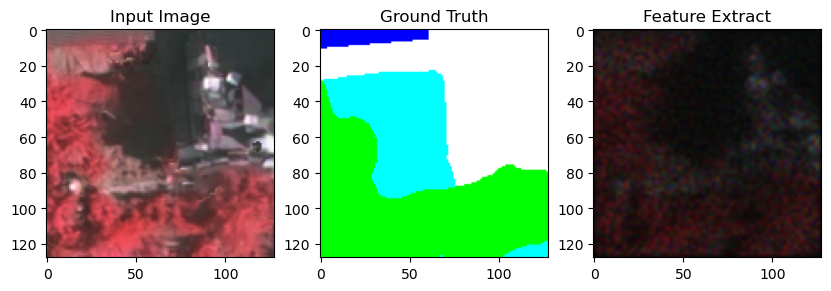

In [6]:
indeks = 1597
# Plot the images
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(images_load[indeks])
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truths[indeks])
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(feature_images_load[indeks])
plt.title('Feature Extract')

plt.show()

In [7]:
# Prepare data
X, y = dp.prepare_data(feature_images_train, image_label_train)

In [8]:
len(X)

3

In [9]:
# Normalize the features
X_normalized = X / 255.0

In [11]:
# Initialize the neural network
input_size = X_normalized.shape[0]
hidden_size = 2  # hidden neuron
output_size = 2  # 2 classes: vegetation and non-vegetation
learning_rate = 0.001
num_epochs = 20
toleransi_error = 0.1

# Initialize the neural network with adjusted hidden size
model = nn.NeuralNetwork(input_size, hidden_size, output_size)

# Check the shape of weights_hidden_output
print(model.weights_hidden_output.shape)


(2, 2)


In [12]:
# Inisialisasi awal bobot bias before train
print(model.weights_hidden_output)
print(model.bias_hidden_output)
print(model.weights_input_hidden)
print(model.bias_input_hidden)

[[ 0.92171149  0.27997206]
 [ 1.         -1.        ]]
[[0. 0.]]
[[-0.33944778 -1.        ]
 [ 1.         -0.99564044]
 [-0.30780634 -0.18861748]]
[[0. 0.]]


In [13]:
batch_size = 128
num_batches = X_normalized.shape[1] // batch_size

print(X_normalized.shape[1])
print(num_batches)

28983296
226432


In [14]:
# Training loop with batching
batch_size = 128
num_batches = X_normalized.shape[1] // batch_size
losses = []
accuracies = []

for epoch in range(num_epochs):
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0
    for i in range(num_batches):
        # Get batch data
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        X_batch = X_normalized[:, start_idx:end_idx].T
        y_batch = y[:, start_idx:end_idx].T
        
        # Forward pass
        output = model.forward(X_batch)
        
        # Compute loss
        loss = nn.binary_cross_entropy(y_batch, output)
        epoch_loss += loss
        
        
        # Compute accuracy
        predicted_labels = np.argmax(output, axis=1)
        true_labels = np.argmax(y_batch, axis=1)
        correct_predictions += np.sum(predicted_labels == true_labels)
        total_predictions += len(true_labels)
        
        # Backpropagation
        model.backward(X_batch, y_batch, learning_rate)
    
    # Average loss for the epoch
    epoch_loss /= num_batches
    losses.append(epoch_loss)
    
    # Accuracy for the epoch
    # accuracy = correct_predictions / total_predictions
    accuracy = 1 - epoch_loss
    accuracies.append(accuracy)
    
    # Print loss
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
    
    # Early stopping
    if epoch_loss < toleransi_error:
        print("Training berhenti karena error sudah kurang dari 0.1")
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {accuracy}')
        break

Epoch 1, Loss: 0.2857372288840324, Accuracy: 0.7142627711159676
Epoch 2, Loss: 0.2721918025460361, Accuracy: 0.7278081974539639
Epoch 3, Loss: 0.26986150149350957, Accuracy: 0.7301384985064905
Epoch 4, Loss: 0.2697235885018263, Accuracy: 0.7302764114981737
Epoch 5, Loss: 0.2697415147643624, Accuracy: 0.7302584852356375
Epoch 6, Loss: 0.26978802983702427, Accuracy: 0.7302119701629757
Epoch 7, Loss: 0.26977688871059635, Accuracy: 0.7302231112894036
Epoch 8, Loss: 0.26981674430577873, Accuracy: 0.7301832556942213
Epoch 9, Loss: 0.26993888750885503, Accuracy: 0.7300611124911449
Epoch 10, Loss: 0.27000157020910753, Accuracy: 0.7299984297908925
Epoch 11, Loss: 0.2699411545206606, Accuracy: 0.7300588454793394
Epoch 12, Loss: 0.26990549253404916, Accuracy: 0.7300945074659508
Epoch 13, Loss: 0.2698484887802089, Accuracy: 0.7301515112197912
Epoch 14, Loss: 0.26900961366565906, Accuracy: 0.730990386334341
Epoch 15, Loss: 0.2676814940545098, Accuracy: 0.7323185059454902
Epoch 16, Loss: 0.266372923

In [15]:
print('Bobot dan bias after train')
print('Bobot hidden-output:')
print(model.weights_hidden_output)
print('Bias hidden-output:')
print(model.bias_hidden_output)
print('Bobot input-hidden:')
print(model.weights_input_hidden)
print('Bias input-hidden:')
print(model.bias_input_hidden)

Bobot dan bias after train
Bobot hidden-output:
[[-3.33070603  3.33070603]
 [ 0.92331358 -0.92331358]]
Bias hidden-output:
[[ 3.3468221 -2.3468221]]
Bobot input-hidden:
[[ 14.07420671 -29.67898771]
 [  7.3158213   43.46656037]
 [  1.30673026  26.4331599 ]]
Bias input-hidden:
[[ 2.56219667 -1.17870384]]


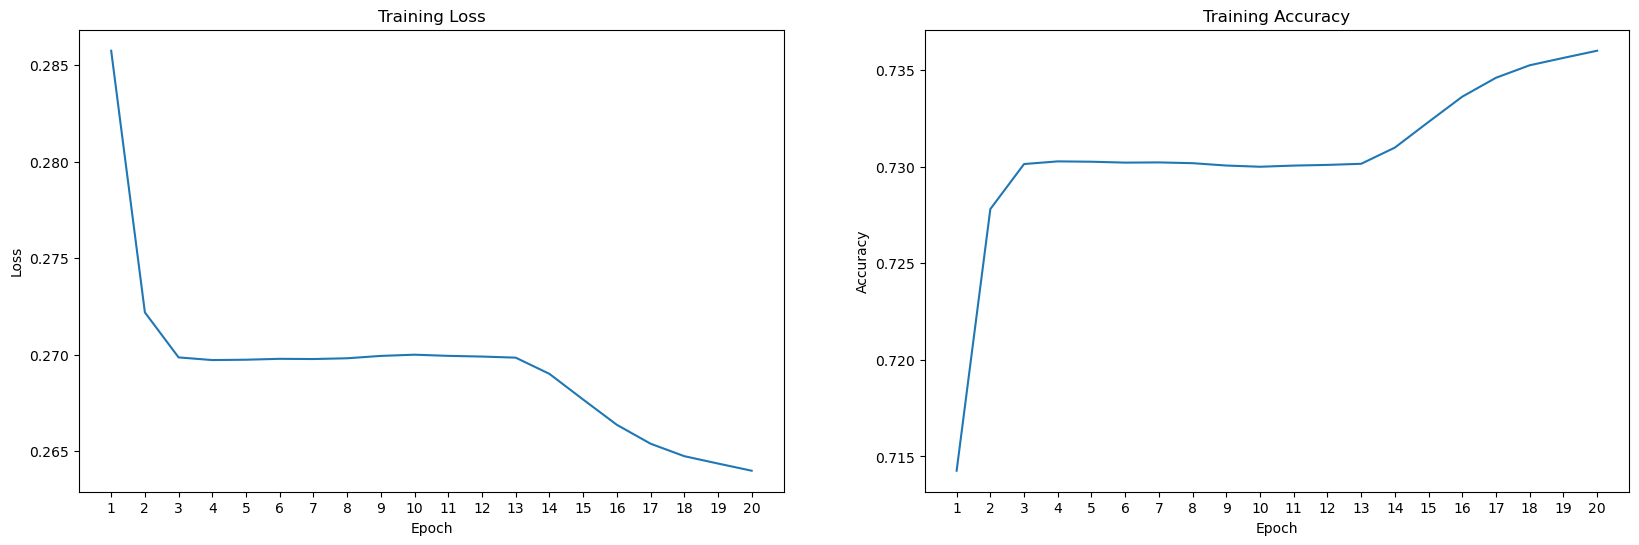

In [16]:
# Plot loss and accuracy
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(losses) + 1), losses)  # Menyesuaikan sumbu x
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(1, len(losses) + 1))  # Menyesuaikan nilai pada sumbu x

plt.subplot(1, 2, 2)
plt.plot(range(1, len(accuracies) + 1), accuracies)  # Menyesuaikan sumbu x
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracies) + 1))  # Menyesuaikan nilai pada sumbu x

plt.show()

In [17]:
# Save weights to a file
def save_weights(weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden, filename):
    with open(filename, 'wb') as f:
        np.savez(f, weights_hidden_output=weights_hidden_output, bias_hidden_output=bias_hidden_output,
                 weights_input_hidden=weights_input_hidden, bias_input_hidden=bias_input_hidden)

# Example usage
weights_hidden_output = model.weights_hidden_output
bias_hidden_output = model.bias_hidden_output
weights_input_hidden = model.weights_input_hidden
bias_input_hidden = model.bias_input_hidden
save_weights(weights_hidden_output, bias_hidden_output, weights_input_hidden, bias_input_hidden, '5. Bobot_skenario_5.npz')

In [18]:
print(model.output)

[[0.25361868 0.74638132]
 [0.23578439 0.76421561]
 [0.23695526 0.76304474]
 [0.27869538 0.72130462]
 [0.22235464 0.77764536]
 [0.22113735 0.77886265]
 [0.27152721 0.72847279]
 [0.42574508 0.57425492]
 [0.40342881 0.59657119]
 [0.38889998 0.61110002]
 [0.2899589  0.7100411 ]
 [0.27951622 0.72048378]
 [0.30918785 0.69081215]
 [0.48027657 0.51972343]
 [0.47370319 0.52629681]
 [0.35914588 0.64085412]
 [0.29541035 0.70458965]
 [0.4130381  0.5869619 ]
 [0.50073892 0.49926108]
 [0.3288673  0.6711327 ]
 [0.23291117 0.76708883]
 [0.25676606 0.74323394]
 [0.27904769 0.72095231]
 [0.23557131 0.76442869]
 [0.37863269 0.62136731]
 [0.57257987 0.42742013]
 [0.36883129 0.63116871]
 [0.12403875 0.87596125]
 [0.18434327 0.81565673]
 [0.63557702 0.36442298]
 [0.76547423 0.23452577]
 [0.4718614  0.5281386 ]
 [0.2826664  0.7173336 ]
 [0.22030018 0.77969982]
 [0.23885298 0.76114702]
 [0.20420016 0.79579984]
 [0.21011632 0.78988368]
 [0.25226626 0.74773374]
 [0.38263584 0.61736416]
 [0.46427162 0.53572838]


before argmax 
 [[0.9394297  0.0605703 ]
 [0.9394297  0.0605703 ]
 [0.9394297  0.0605703 ]
 ...
 [0.93942965 0.06057035]
 [0.93942965 0.06057035]
 [0.93942965 0.06057035]]
after argmax 
 [[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


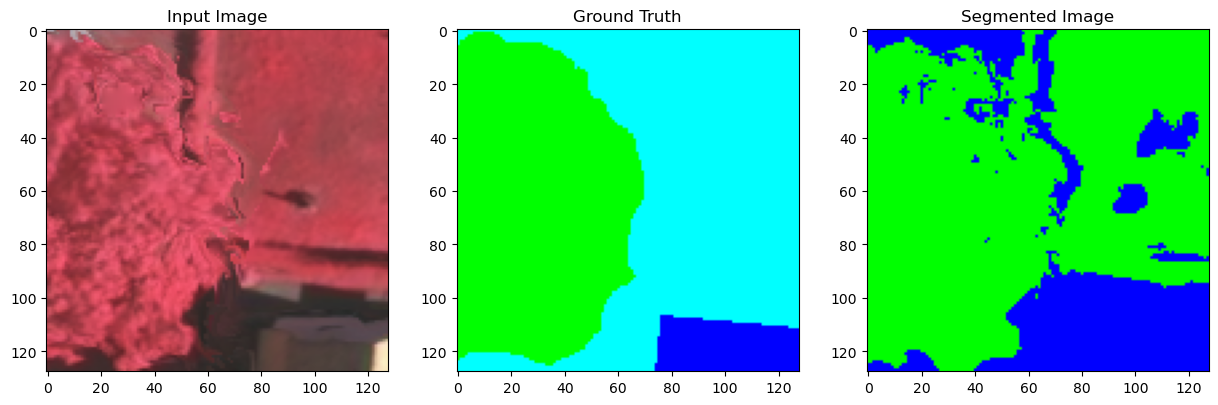

In [19]:
# Define colors for vegetation and non-vegetation
vegetation_color = [0, 255, 0]  # Green
non_vegetation_color = [0, 0, 255]  # Blue

# Visualize segmentation results for one image
indexing = 2
input_image = images_load[indexing]
ground_truth = ground_truths[indexing]
features_get = fe.extract(input_image)

# Preprocess the input image
input_image_reshaped = cv2.resize(input_image, (128, 128)) / 255.0
features = input_image_reshaped.reshape(-1, 3)  # Remove the transpose operation here

# Predict segmentation mask
predicted_mask = model.forward(features)
pred_before = predicted_mask
print('before argmax \n',pred_before)
predicted_mask = predicted_mask.argmax(axis=1).reshape(128, 128)
pred_after= predicted_mask
print('after argmax \n',pred_after)
# print(len(predicted_mask))
# Create segmented image
segmented_image = np.zeros((128, 128, 3), dtype=np.uint8)

# Assign colors based on predicted mask
segmented_image[predicted_mask == 0] = non_vegetation_color
segmented_image[predicted_mask == 1] = vegetation_color

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()

In [24]:
print('nilai prediksi \n', pred_before[50:60])
print('hasil argmax \n', pred_after[2][50:60])

nilai prediksi 
 [[ 0.91309717  0.08292262]
 [ 0.9657361   0.03225555]
 [ 0.99289534  0.00696309]
 [ 1.01450834 -0.01145675]
 [ 1.01434747 -0.0074396 ]
 [ 1.00350878  0.00605556]
 [ 0.99560038  0.01536018]
 [ 0.99342313  0.01787501]
 [ 0.99394047  0.01728584]
 [ 0.99504067  0.01600845]]
hasil argmax 
 [0 0 0 0 0 0 0 0 0 0]


Indeks yang ada warna merah
> 2007
> 2011 - 2013

Keperluan BI indeks analisa : 6, 19, 2012, 3192

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(1, 3, 2)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Segmented Image')

=-=-=--=-=

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(input_image)
plt.title('Input Image')

plt.subplot(2, 2, 2)
plt.imshow(features_get)
plt.title('Feature Maps')

plt.subplot(2, 2, 3)
plt.imshow(ground_truth)
plt.title('Ground Truth')

plt.subplot(2, 2, 4)
plt.imshow(segmented_image)
plt.title('Segmented Image')